# Homework-2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

In [6]:
batch_size = 100
max_epoch = 40
init_std = 0.01

learning_rate_SGD = 0.003

# (0.1 : 0.84) (0.001 : 0.89) (0.00001 : 0.88)
weight_decay = 0.001

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [7]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [8]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [9]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Epoch [0][40]	 Batch [0][550]	 Training Loss 0.2940	 Accuracy 0.0800
Epoch [0][40]	 Batch [50][550]	 Training Loss 0.1068	 Accuracy 0.2961
Epoch [0][40]	 Batch [100][550]	 Training Loss 0.0960	 Accuracy 0.4492
Epoch [0][40]	 Batch [150][550]	 Training Loss 0.0908	 Accuracy 0.5251
Epoch [0][40]	 Batch [200][550]	 Training Loss 0.0873	 Accuracy 0.5781
Epoch [0][40]	 Batch [250][550]	 Training Loss 0.0847	 Accuracy 0.6146
Epoch [0][40]	 Batch [300][550]	 Training Loss 0.0828	 Accuracy 0.6410
Epoch [0][40]	 Batch [350][550]	 Training Loss 0.0814	 Accuracy 0.6607
Epoch [0][40]	 Batch [400][550]	 Training Loss 0.0801	 Accuracy 0.6777
Epoch [0][40]	 Batch [450][550]	 Training Loss 0.0791	 Accuracy 0.6908
Epoch [0][40]	 Batch [500][550]	 Training 

In [10]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9403.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [16]:
batch_size = 100
max_epoch = 40
init_std = 0.01

# (0.1 : 0.92) (0.001 : 0.94) (0.00001 : 0.93)
learning_rate_SGD = 0.003
weight_decay = 0.001

disp_freq = 50

In [17]:
from layers import FCLayer, ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [18]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][40]	 Batch [0][550]	 Training Loss 0.3434	 Accuracy 0.0500
Epoch [0][40]	 Batch [50][550]	 Training Loss 0.1402	 Accuracy 0.3427
Epoch [0][40]	 Batch [100][550]	 Training Loss 0.1190	 Accuracy 0.4719
Epoch [0][40]	 Batch [150][550]	 Training Loss 0.1084	 Accuracy 0.5443
Epoch [0][40]	 Batch [200][550]	 Training Loss 0.1013	 Accuracy 0.5929
Epoch [0][40]	 Batch [250][550]	 Training Loss 0.0961	 Accuracy 0.6318
Epoch [0][40]	 Batch [300][550]	 Training Loss 0.0920	 Accuracy 0.6617
Epoch [0][40]	 Batch [350][550]	 Training Loss 0.0888	 Accuracy 0.6838
Epoch [0][40]	 Batch [400][550]	 Training Loss 0.0861	 Accuracy 0.7032
Epoch [0][40]	 Batch [450][550]	 Training Loss 0.0838	 Accuracy 0.7194
Epoch [0][40]	 Batch [500][550]	 Training Loss 0.0818	 Accuracy 0.7321

Epoch [0]	 Average training loss 0.0799	 Average training accuracy 0.7443
Epoch [0]	 Average validation loss 0.0576	 Average validation accuracy 0.9012

Epoch [1][40]	 Batch [0][550]	 Training Loss 0.0586	 Accuracy 0.9000

In [19]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9666.



## Plot

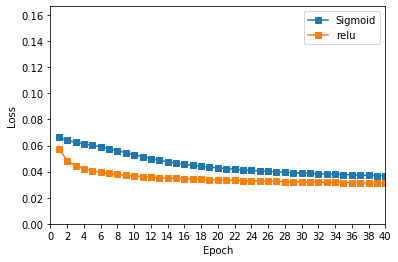

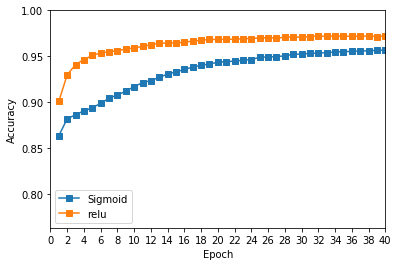

In [20]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [39]:
batch_size = 100
max_epoch = 40
init_std = 0.01

learning_rate_SGD = 5e-3

# (0.31 : 0.1) (0.001 : 0.87) (0.001 : 0.88)
weight_decay = 1e-3

disp_freq = 50

In [40]:
from criterion import SoftmaxCrossEntropyLossLayer
from layers import FCLayer, SigmoidLayer, ReLULayer
from optimizer import SGD

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [41]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [42]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][40]	 Batch [0][550]	 Training Loss 2.9016	 Accuracy 0.1100
Epoch [0][40]	 Batch [50][550]	 Training Loss 2.5049	 Accuracy 0.1184
Epoch [0][40]	 Batch [100][550]	 Training Loss 2.3759	 Accuracy 0.1455
Epoch [0][40]	 Batch [150][550]	 Training Loss 2.3081	 Accuracy 0.1877
Epoch [0][40]	 Batch [200][550]	 Training Loss 2.2588	 Accuracy 0.2285
Epoch [0][40]	 Batch [250][550]	 Training Loss 2.2194	 Accuracy 0.2641
Epoch [0][40]	 Batch [300][550]	 Training Loss 2.1828	 Accuracy 0.2989
Epoch [0][40]	 Batch [350][550]	 Training Loss 2.1527	 Accuracy 0.3254
Epoch [0][40]	 Batch [400][550]	 Training Loss 2.1219	 Accuracy 0.3522
Epoch [0][40]	 Batch [450][550]	 Training Loss 2.0943	 Accuracy 0.3757
Epoch [0][40]	 Batch [500][550]	 Training Loss 2.0670	 Accuracy 0.3972

Epoch [0]	 Average training loss 2.0413	 Average training accuracy 0.4175
Epoch [0]	 Average validation loss 1.7310	 Average validation accuracy 0.6664

Epoch [1][40]	 Batch [0][550]	 Training Loss 1.7420	 Accuracy 0.6300

### Test

In [43]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9048.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [44]:
batch_size = 100
max_epoch = 40
init_std = 0.01

learning_rate_SGD = 4e-3
weight_decay = 1e-3

disp_freq = 50

In [45]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [46]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][40]	 Batch [0][550]	 Training Loss 2.6442	 Accuracy 0.1000
Epoch [0][40]	 Batch [50][550]	 Training Loss 2.3083	 Accuracy 0.1614
Epoch [0][40]	 Batch [100][550]	 Training Loss 2.1158	 Accuracy 0.2598
Epoch [0][40]	 Batch [150][550]	 Training Loss 1.9603	 Accuracy 0.3483
Epoch [0][40]	 Batch [200][550]	 Training Loss 1.8406	 Accuracy 0.4153
Epoch [0][40]	 Batch [250][550]	 Training Loss 1.7335	 Accuracy 0.4680
Epoch [0][40]	 Batch [300][550]	 Training Loss 1.6401	 Accuracy 0.5113
Epoch [0][40]	 Batch [350][550]	 Training Loss 1.5653	 Accuracy 0.5443
Epoch [0][40]	 Batch [400][550]	 Training Loss 1.4938	 Accuracy 0.5718
Epoch [0][40]	 Batch [450][550]	 Training Loss 1.4324	 Accuracy 0.5947
Epoch [0][40]	 Batch [500][550]	 Training Loss 1.3768	 Accuracy 0.6139

Epoch [0]	 Average training loss 1.3257	 Average training accuracy 0.6316
Epoch [0]	 Average validation loss 0.7080	 Average validation accuracy 0.8522

Epoch [1][40]	 Batch [0][550]	 Training Loss 0.7485	 Accuracy 0.8500

In [47]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9429.



## Plot

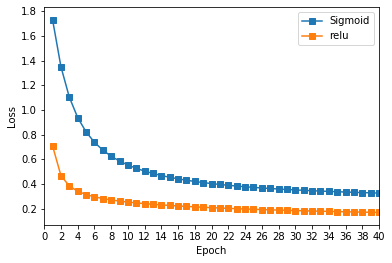

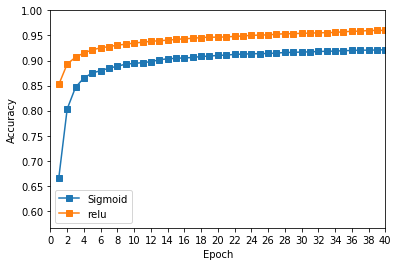

In [48]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework2-mlp, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

In [16]:
batch_size = 100
max_epoch = 60
init_std = 0.01

learning_rate_SGD = 3e-3
weight_decay = 1e-3

disp_freq = 60

In [17]:
from criterion import SoftmaxCrossEntropyLossLayer, EuclideanLossLayer
from layers import FCLayer, SigmoidLayer, ReLULayer
from optimizer import SGD

# criterion = SoftmaxCrossEntropyLossLayer()
criterion = EuclideanLossLayer()


sgd = SGD(learning_rate_SGD, weight_decay)

reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 64))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(64, 10))

reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][60]	 Batch [0][550]	 Training Loss 0.2714	 Accuracy 0.1500
Epoch [0][60]	 Batch [60][550]	 Training Loss 0.1126	 Accuracy 0.4272
Epoch [0][60]	 Batch [120][550]	 Training Loss 0.0982	 Accuracy 0.5376
Epoch [0][60]	 Batch [180][550]	 Training Loss 0.0915	 Accuracy 0.5943
Epoch [0][60]	 Batch [240][550]	 Training Loss 0.0865	 Accuracy 0.6383
Epoch [0][60]	 Batch [300][550]	 Training Loss 0.0828	 Accuracy 0.6690
Epoch [0][60]	 Batch [360][550]	 Training Loss 0.0800	 Accuracy 0.6930
Epoch [0][60]	 Batch [420][550]	 Training Loss 0.0776	 Accuracy 0.7129
Epoch [0][60]	 Batch [480][550]	 Training Loss 0.0756	 Accuracy 0.7274
Epoch [0][60]	 Batch [540][550]	 Training Loss 0.0738	 Accuracy 0.7407

Epoch [0]	 Average training loss 0.0735	 Average training accuracy 0.7426
Epoch [0]	 Average validation loss 0.0553	 Average validation accuracy 0.8836

Epoch [1][60]	 Batch [0][550]	 Training Loss 0.0542	 Accuracy 0.8800
Epoch [1][60]	 Batch [60][550]	 Training Loss 0.0556	 Accuracy 0.8800


In [18]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9758.



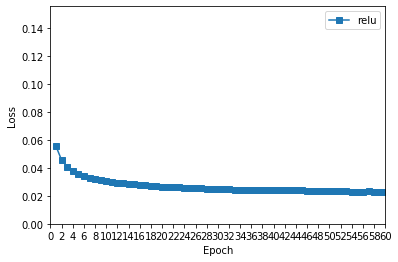

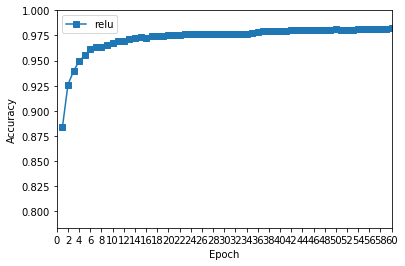

In [19]:
plot_loss_and_acc({'relu': [relu_loss, relu_acc]})